In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("./results.csv", skipinitialspace=True)

# Create a DataFrame of the mean value of the runs for each kernel, for each model, for one architecture
def average(arch):
    return data.loc[data['arch'] == arch].groupby(['kernel','model'], as_index=False).mean()

# Create a DataFrame of the minimum value of the runs for each kernel, for each model, for one architecture
def lower(arch):
    return data.loc[data['arch'] == arch].groupby(['kernel','model'], as_index=False).min()

# Create a DataFrame of the maximum value of the runs for each kernel, for each model, for one architecture
def upper(arch):
    return data.loc[data['arch'] == arch].groupby(['kernel','model'], as_index=False).max()


# Create a DataFrame of the mean value of the runs for each kernel for one architecture/compiler combination
def average_c(arch, compiler):
    return data.loc[(data['arch'] == arch) & (data['compiler'] == compiler)].groupby(['kernel','model'], as_index=False).mean()

# Plot a grouped bar chart of mean value of each kernel in each model for a given architecture
def plot(arch):
    chart = sns.catplot(x='kernel', y='bandwidth', hue='model', data=average(arch), kind='bar', ci=None)
    chart.set_xticklabels(rotation=45, horizontalalignment="right")
    chart.savefig('{0}.png'.format(arch))

# Plot a grouped bar chart of mean value of each kernel in each model for a given architecture/compiler combination
def plot_c(arch, compiler):
    chart = sns.catplot(x='kernel', y='bandwidth', hue='model', data=average_c(arch, compiler), kind='bar', ci=None)
    chart.set_xticklabels(rotation=45, horizontalalignment="right")
    chart.savefig('{0}_{1}.png'.format(arch,compiler))

             kernel        model  arch compiler  bandwidth
0       complex_min   omp_target  gen9     icpx   11.15310
1       complex_min         sycl  gen9    dpcpp   17.70290
2       complex_sum  kokkos_sycl  gen9    dpcpp   24.51280
3       complex_sum   omp_target  gen9     icpx   22.15900
4       complex_sum         sycl  gen9    dpcpp   24.46820
5   complex_sum_soa  kokkos_sycl  gen9    dpcpp   24.61560
6   complex_sum_soa   omp_target  gen9     icpx   21.51580
7   complex_sum_soa         sycl  gen9    dpcpp   21.02350
8          describe  kokkos_sycl  gen9    dpcpp    9.66253
9          describe   omp_target  gen9     icpx   16.64800
10         describe         sycl  gen9    dpcpp   14.62330
11              dot  kokkos_sycl  gen9    dpcpp   24.77300
12              dot   omp_target  gen9     icpx   22.16350
13              dot         sycl  gen9    dpcpp   24.66060
14    field_summary  kokkos_sycl  gen9    dpcpp    7.05861
15    field_summary   omp_target  gen9     icpx    4.115

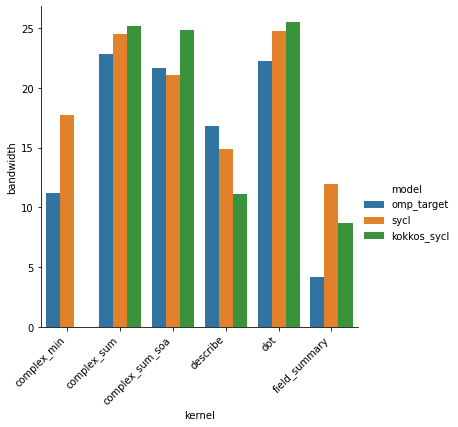

In [3]:
print(lower('gen9'))
print(upper('gen9'))


plot('gen9')

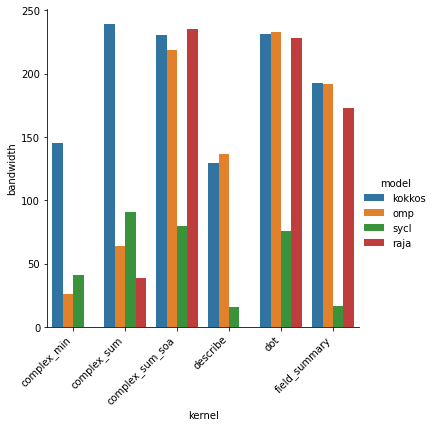

In [4]:
plot('cxl')

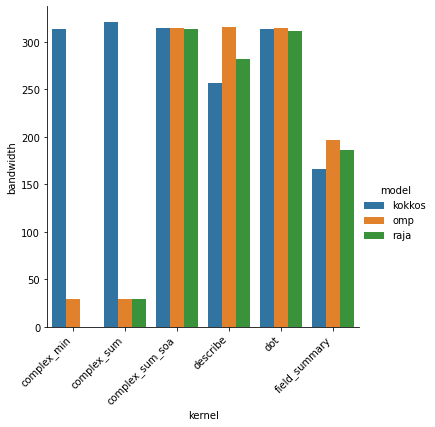

In [5]:
plot_c('rome', 'cce')

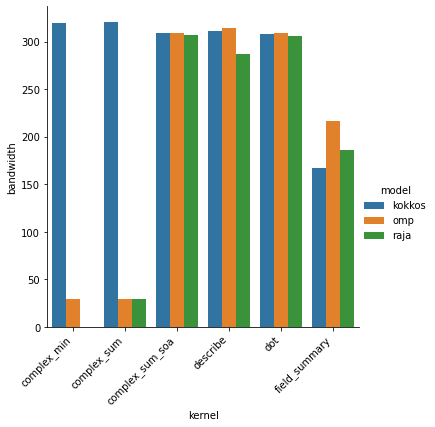

In [6]:
plot_c('rome', 'aocc')